# K-Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We can visualize the algorithm as shown in the following figure.
![](../figures/em.png)

## 1. Scratch

In [2]:
from sklearn.metrics import pairwise_distances_argmin

X = np.array([[2, 3], [1, 2], [6, 7]]) #close to center 1, 0, 2
centers = np.array([[1, 1], [2, 2], [3, 3]])

pairwise_distances_argmin(X, centers)

array([1, 0, 2])

In [3]:
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from time import time

X, y_true = make_blobs(n_samples=1500, centers=4, cluster_std=0.60, random_state=0)

In [4]:
def kmeans(X, k):
    m, n = X.shape
    
    #1. randomly choose k clusters from X
    rng = np.random.RandomState(42)
    i   = rng.permutation(m)[:k] #[52, 23, 109]
    centers = X[i]
    
    #2. E-step: assign labels to the nearest centers
    iteration = 0
    while True:
        labels = pairwise_distances_argmin(X, centers)
        
        new_centers = []
        for i in range(k):
            new_centers.append(X[labels==i].mean(axis=0))
            
        #convert list to np.array
        new_centers = np.array(new_centers)
        
        #compute total within-variation score
        total_within_variation_score = 0
        labels = pairwise_distances_argmin(X, centers)
        for i in range(k):
            cluster_mean = X[labels==i].mean(axis=0)
            total_within_variation_score += ((X[labels==i] - cluster_mean) ** 2).sum()
            
        print("Total with variation score: ", total_within_variation_score)
        
        #plotting
        if (iteration % 5 == 0):
            pred = pairwise_distances_argmin(X, new_centers)
            plt.figure(figsize=(5, 2))
            plt.title(f"Iteration: {iteration}")
            plt.scatter(X[:, 0], X[:, 1], c=pred)
            plt.scatter(new_centers[:, 0], new_centers[:, 1], s=100, c="black", alpha=0.6)
            
        #stopping
        if(np.allclose(centers, new_centers)):
            break
        else:
            centers = new_centers
            iteration+=1
    
    print(f"Done in {iteration} iterations")
    return centers

In [5]:
def predict(X, centers):
    return pairwise_distances_argmin(X, centers)

In [6]:
X.shape

(1500, 2)

Total with variation score:  3349.4613338786116
Total with variation score:  3230.347486876175
Total with variation score:  3186.743520060989
Total with variation score:  3143.4444396576937
Total with variation score:  3087.9589705293247
Total with variation score:  2970.4706272730923
Total with variation score:  2737.813535684265
Total with variation score:  2470.7511099365265
Total with variation score:  2387.4812845588044
Total with variation score:  2143.680449323203
Total with variation score:  1324.5748319321285
Total with variation score:  1025.6220591931638
Total with variation score:  1006.3602710742581
Total with variation score:  1006.3420400278767
Total with variation score:  1006.3420400278767
Done in 14 iterations


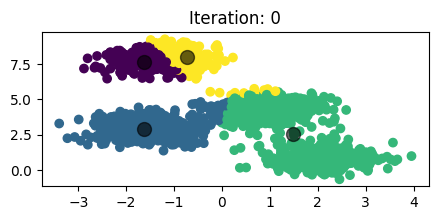

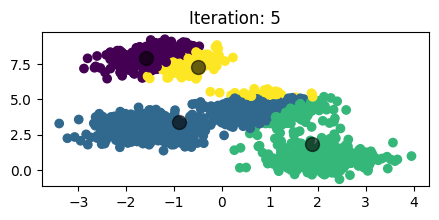

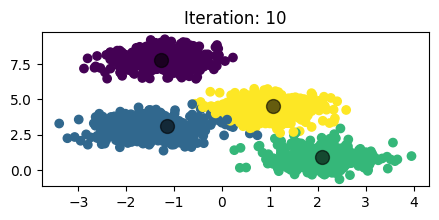

In [7]:
centers = kmeans(X, k=4)

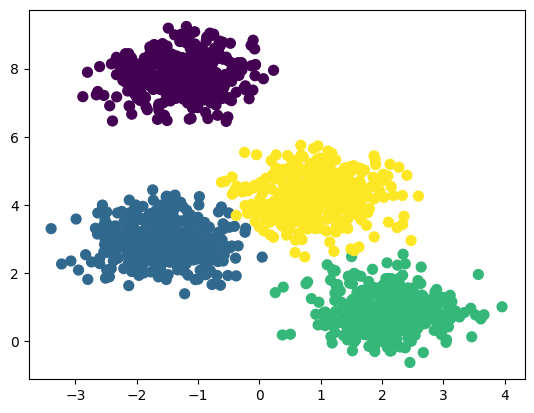

In [8]:
preds = predict(X, centers)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=preds, s=50)